## Analiza zbioru
#### Sasnal Jakub & Aleksander Nosal

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv('./insurance.csv', delimiter=';')
data.head()

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast,northeast
0,19,1,27.900,0,1,16884.92400,1,0,0,0
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,-4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [16]:
data.describe()

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast,northeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,29.883042,1.094918,0.204783,12907.470290,0.242900,0.242900,0.272048,0.242152
std,14.049960,0.500160,7.709303,1.205493,0.403694,12165.501906,0.428995,0.428995,0.445181,0.428546
min,18.000000,0.000000,0.000000,0.000000,0.000000,-11881.358000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,25.842500,0.000000,0.000000,4444.510525,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.200000,1.000000,0.000000,9178.152825,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.430000,2.000000,0.000000,16209.325762,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [34]:
le = preprocessing.LabelEncoder()
le.fit(data['charges'])
data['charges']=le.transform(data['charges'])
data.head()

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast,northeast
0,19,1,27.900,0,1,979,1,0,0,0
1,18,0,33.770,1,0,62,0,0,1,0
2,28,0,33.000,3,0,1,0,0,1,0
3,33,0,22.705,0,0,1070,0,1,0,0
4,32,0,28.880,0,0,253,0,1,0,0


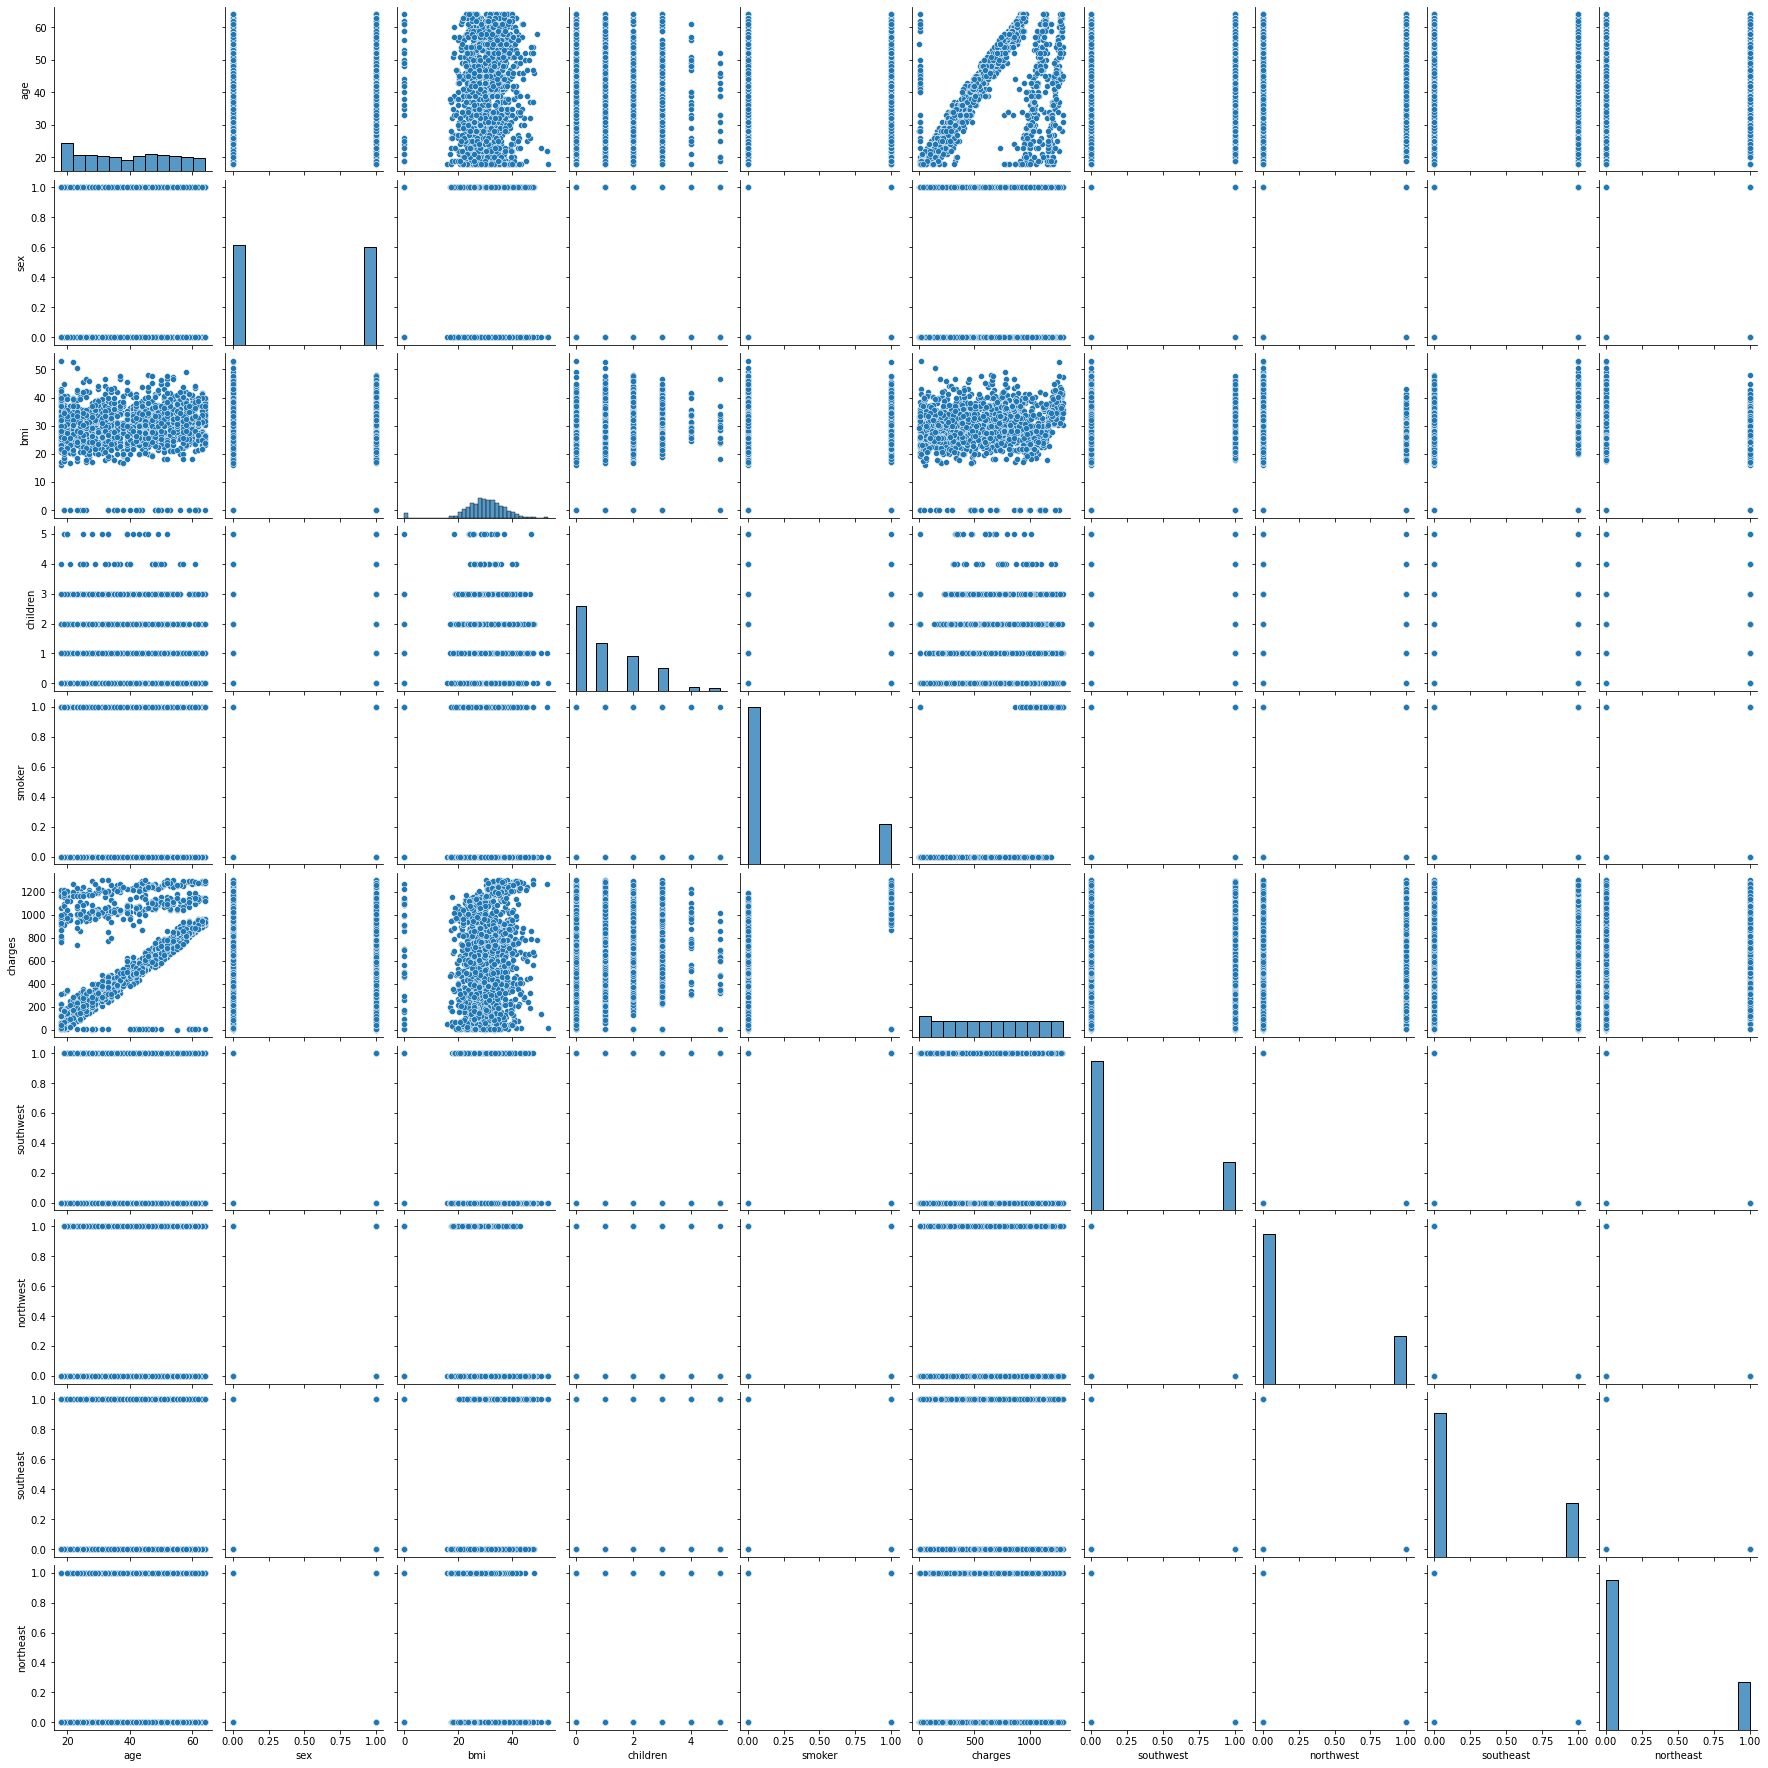

In [35]:
import seaborn as sns

sns.pairplot(data)

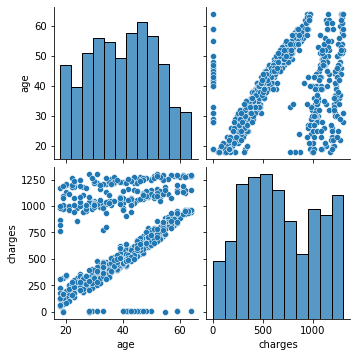

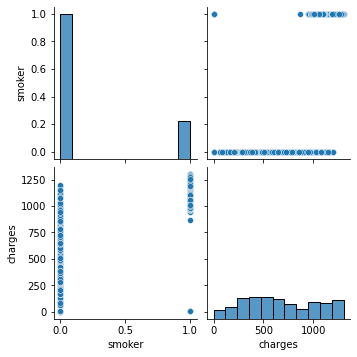

In [45]:
data_prep = data[data['age'] > 0]
data_prep = data_prep[data_prep['children'] > 0]

sns.pairplot(data_prep[['age', 'charges']])
sns.pairplot(data_prep[['smoker', 'charges']])

Można zauważyć, że im starsza osoba tym większe opłaty za ubezpieczenie, także duży wpływ ma to czy osoba jest paląca


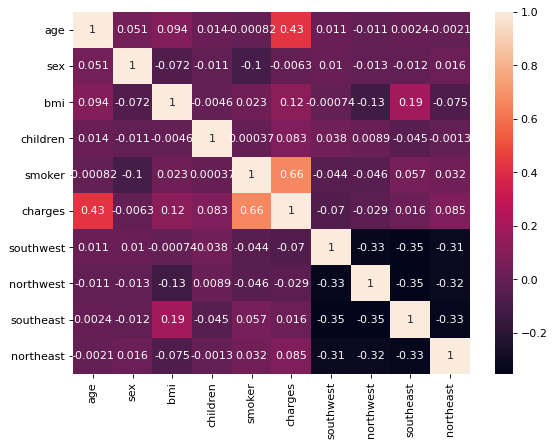

In [37]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


figure(figsize=(8, 6), dpi=80)

corrMatrix = data_prep.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Tablica korelacji potwierdza wcześniej postawioną teze. Największa korelacja zależy od tego czy pali a nastęnie od wieku.

In [38]:
data_prep.describe()

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast,northeast
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,39.780105,0.488220,29.966852,1.917539,0.208115,666.666230,0.244764,0.252618,0.270942,0.231675
std,11.927317,0.500189,7.816288,0.983351,0.406226,357.817437,0.430229,0.434798,0.444738,0.422179
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,25.900000,1.000000,0.000000,376.750000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,30.200000,2.000000,0.000000,624.500000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,34.443750,3.000000,0.000000,993.250000,0.000000,1.000000,1.000000,0.000000
max,64.000000,1.000000,52.580000,5.000000,1.000000,1302.000000,1.000000,1.000000,1.000000,1.000000


Nie ma bardzo odstających danych, które można by uznać za błędne


In [39]:
np.sum(data_prep.isna())

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
southwest    0
northwest    0
southeast    0
northeast    0
dtype: int64

In [40]:
data_prep = data_prep.fillna(data_prep.mean())
np.sum(data_prep.isna())

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
southwest    0
northwest    0
southeast    0
northeast    0
dtype: int64

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'southwest',
       'northwest', 'southeast', 'northeast'],
      dtype='object')


C:\Users\kubas.DESKTOP-ES05FD2\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>],
       [<AxesSubplot:title={'center':'southwest'}>,
        <AxesSubplot:title={'center':'northwest'}>,
        <AxesSubplot:title={'center':'southeast'}>],
       [<AxesSubplot:title={'center':'northeast'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

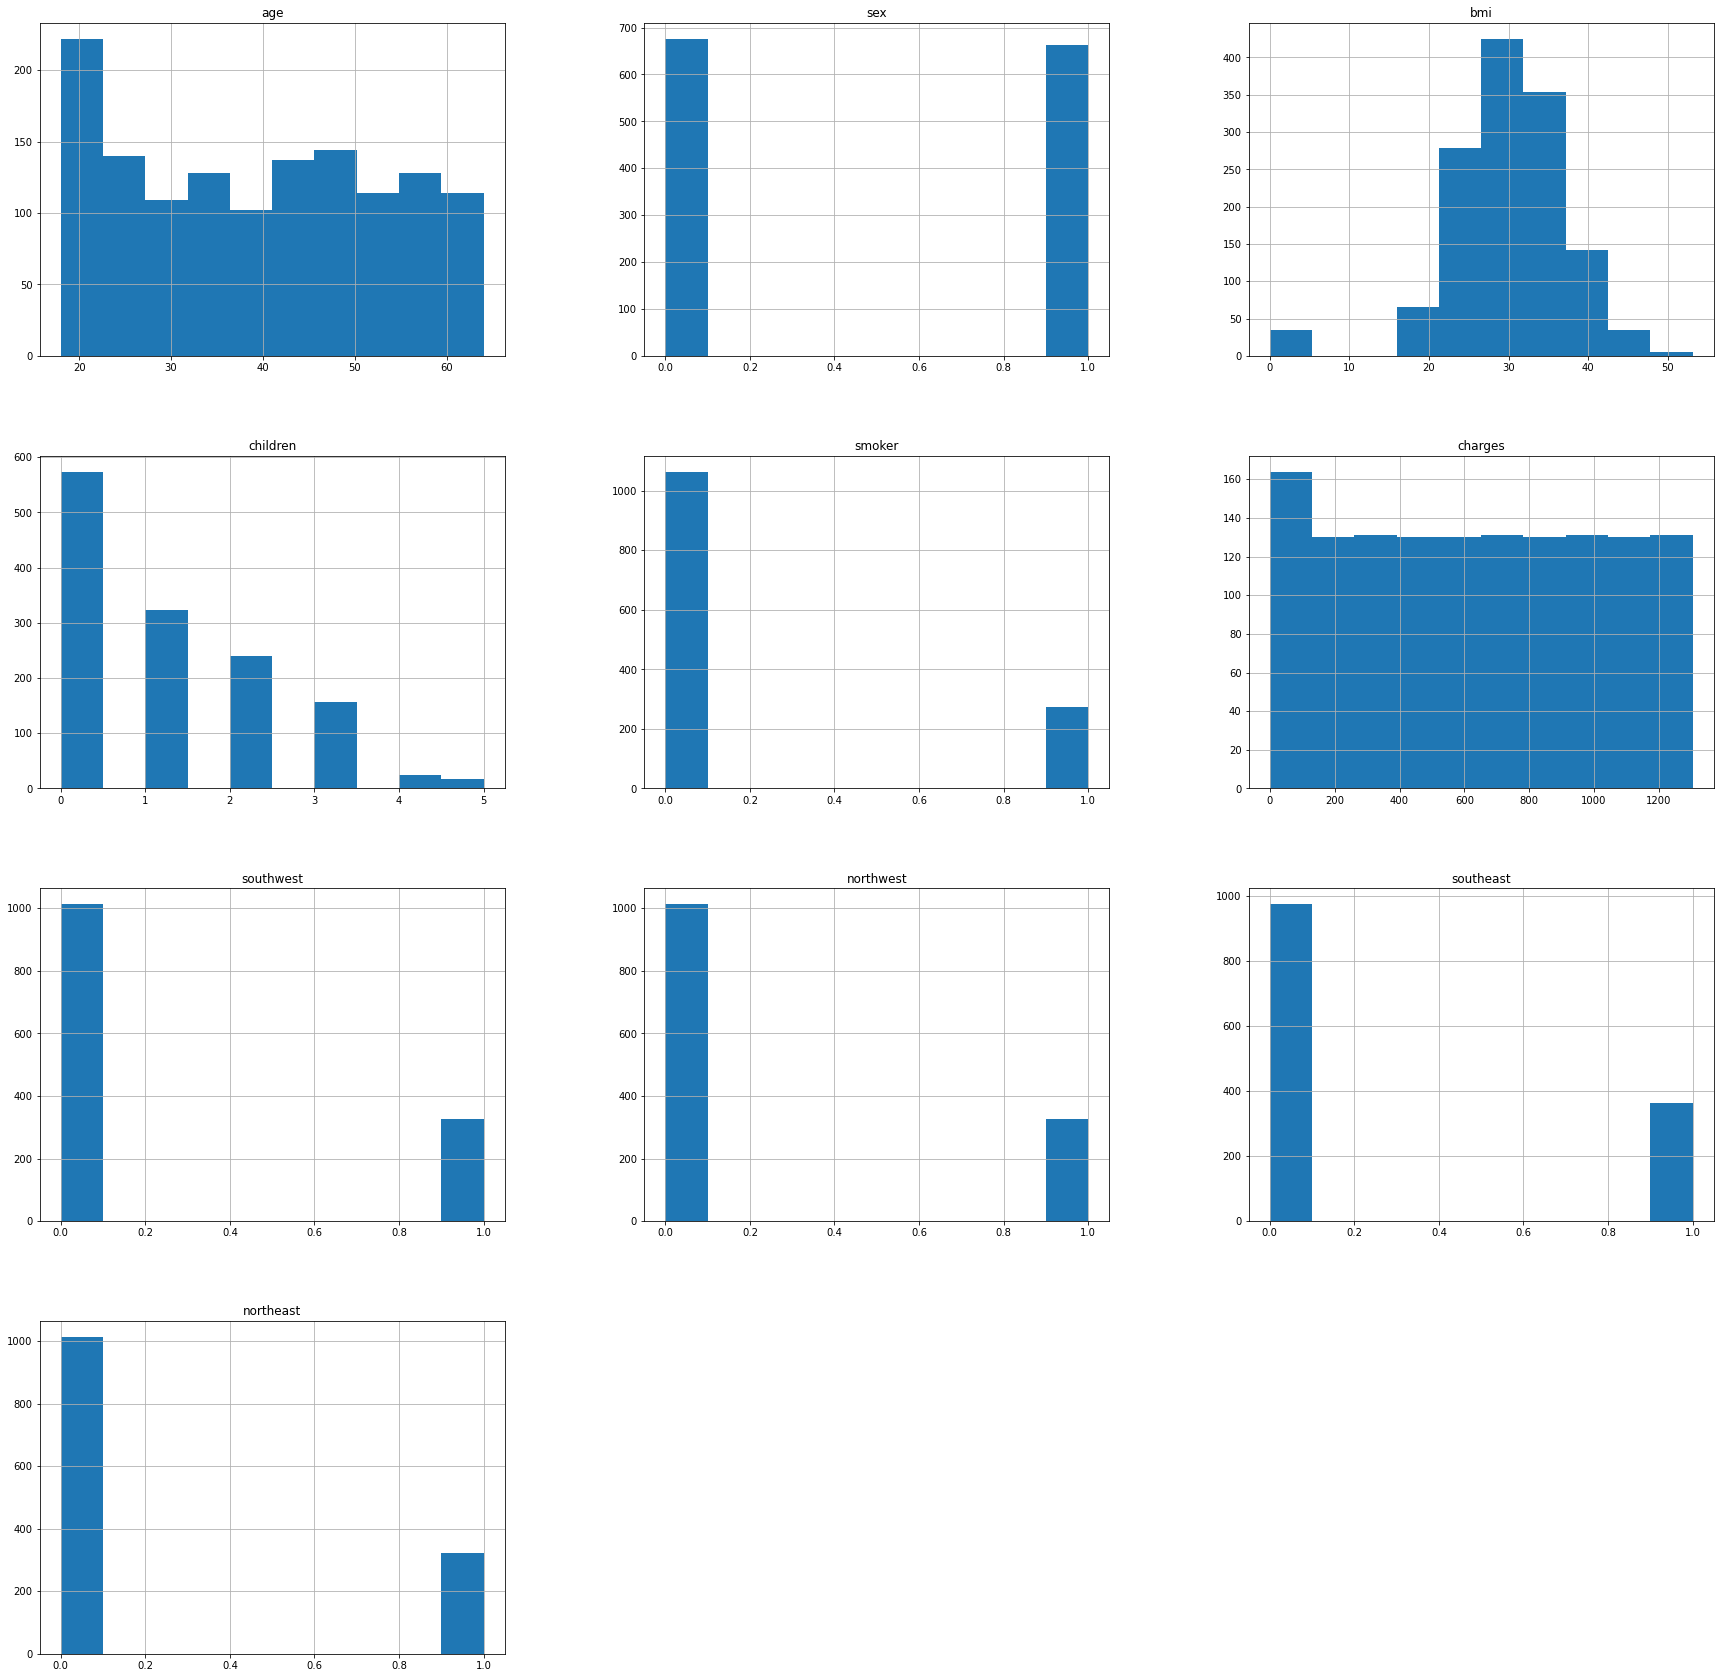

In [41]:
print(data_prep.columns)

data.hist(figsize=(30, 30))

Można zauważyć, że w naszych danych opłaty nie mają rozkładu normalnego, więc nie ma dominującej grupy

<AxesSubplot:>

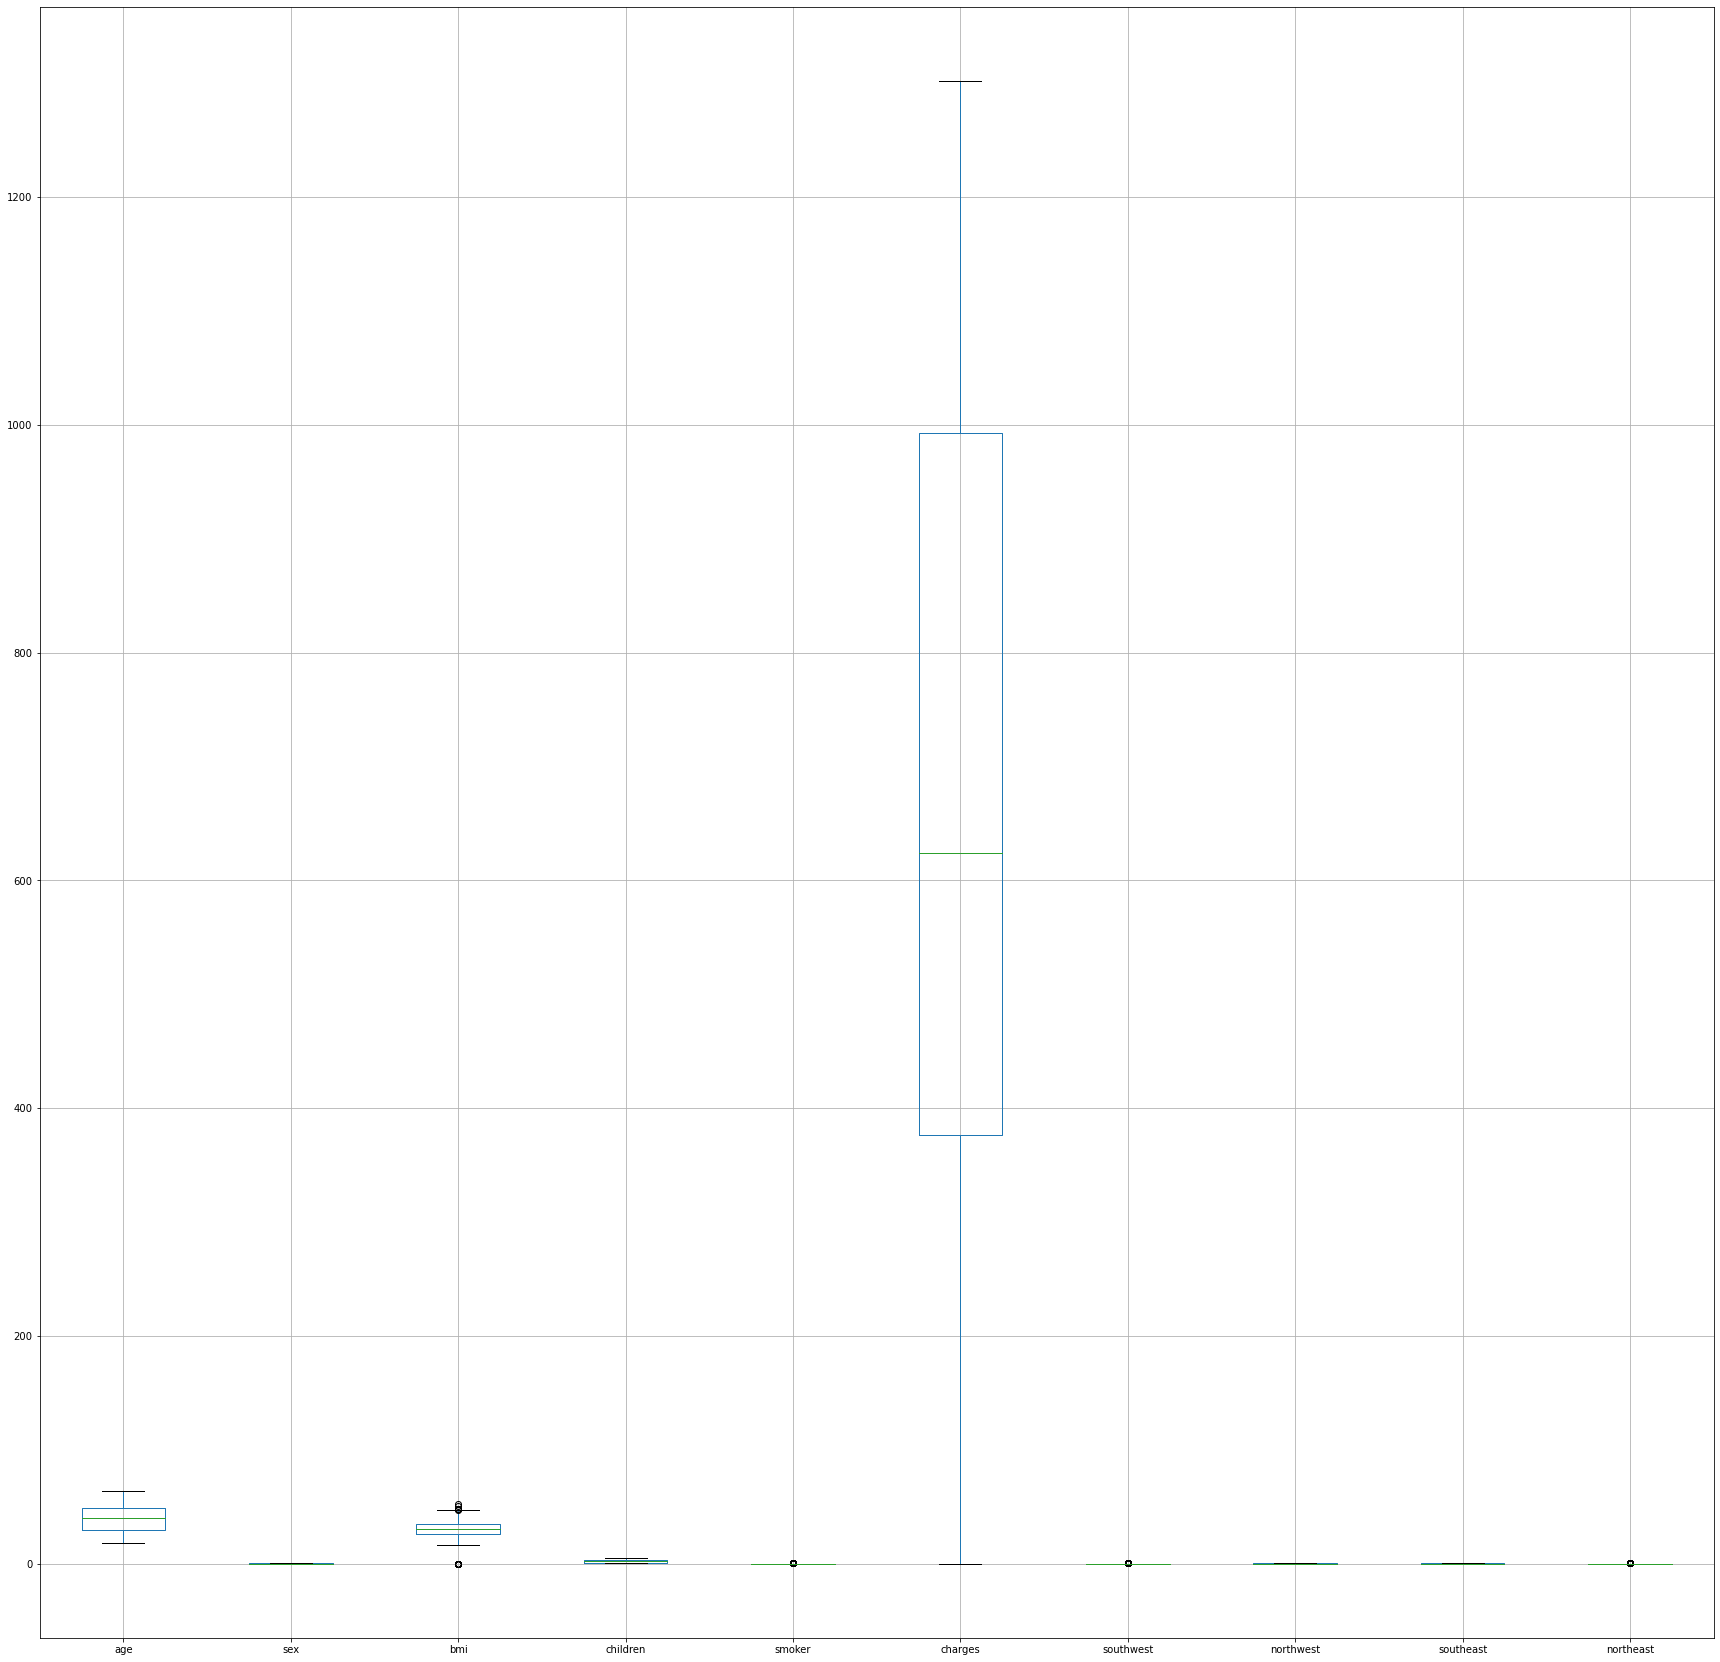

In [42]:
data_prep.boxplot(figsize=(30, 30))


<AxesSubplot:>

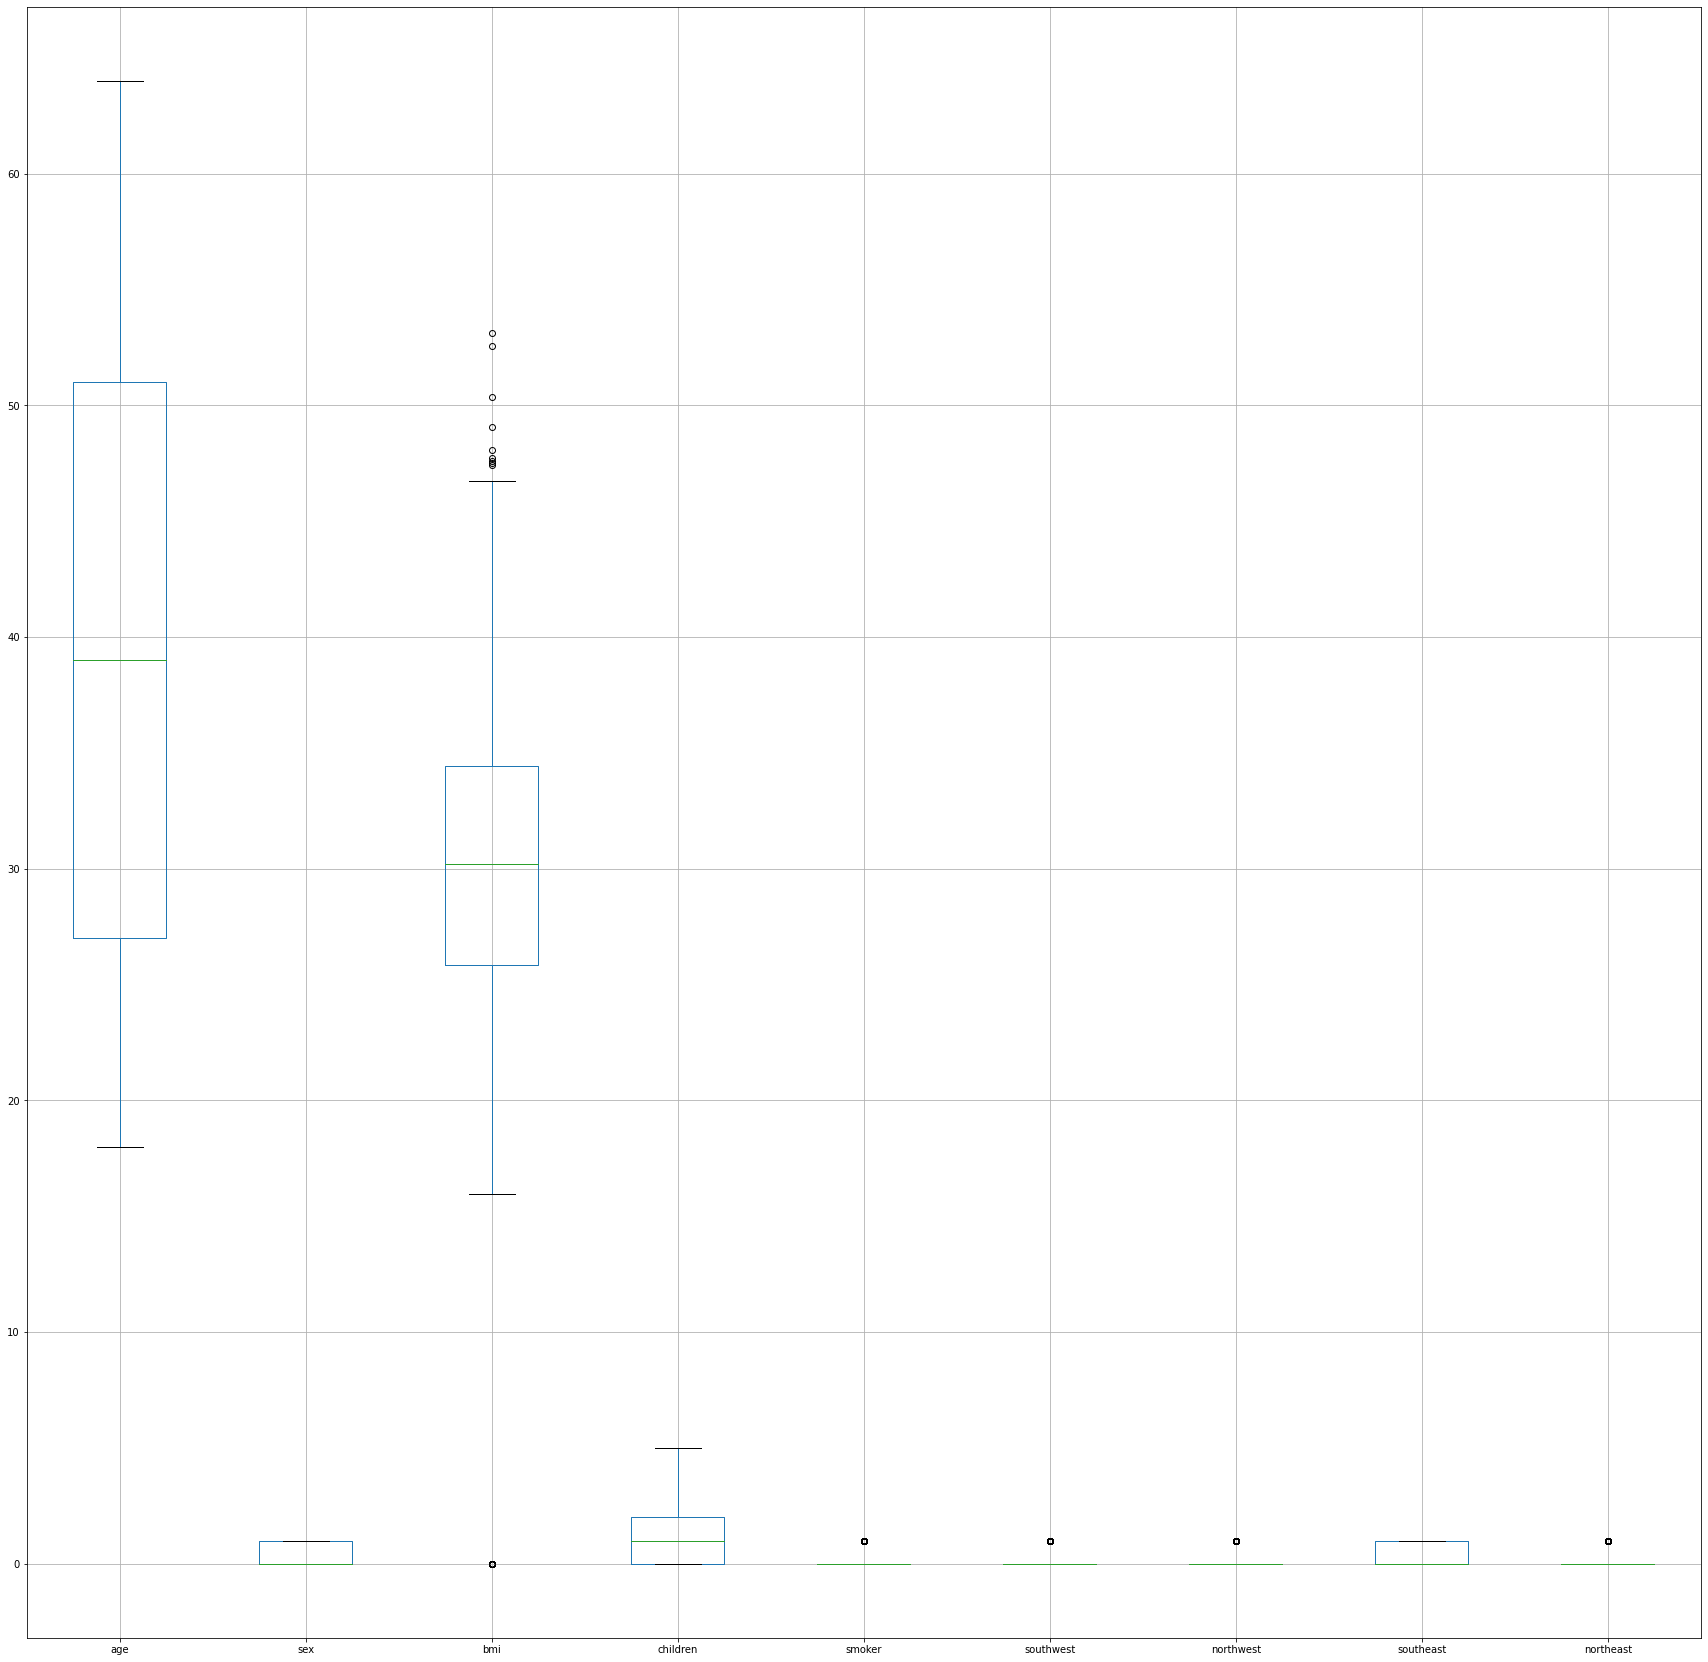

In [43]:
df = data.drop(['charges'], axis = 1)
df.boxplot(figsize=(30, 30))

Jako wartości odstające są u nas osoby o dużym BMI, jenak nie na tyle dużym, żeby usunąć je z danych lub uznać za fałszywe.